In [ ]:
!pip install pmdarima
!pip install pandas==0.23.4

     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 9.5 MB 46.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 8.8 MB 4.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.23.4 which is incompatible.
pymc3 3.11.2 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
plotnine 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23.4 which is incompatible.
mizani 0.6.0 requires pandas>=0.25.0, but you have pandas 0.23

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import math

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
%matplotlib inline
from google.colab import drive

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!curl https://sdk.cloud.google.com | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   443  100   443    0     0  16407      0 --:--:-- --:--:-- --:--:-- 16407
######################################################################## 100.0%
Running install script from: /tmp/tmp.bvsio0iWUf/install_google_cloud_sdk.bash
which curl
curl -# -f https://dl.google.com/dl/cloudsdk/channels/rapid/google-cloud-sdk.tar.gz
######################################################################## 100.0%

mkdir -p /root
"/root/google-cloud-sdk" already exists and may contain out of date files.
Remove /root/google-cloud-sdk or select a new installation directory, then run again.


In [ ]:
!gsutil ls gs://clusterdata-2011-2/

gs://clusterdata-2011-2/MD5SUM
gs://clusterdata-2011-2/README
gs://clusterdata-2011-2/SHA1SUM
gs://clusterdata-2011-2/SHA256SUM
gs://clusterdata-2011-2/schema.csv
gs://clusterdata-2011-2/job_events/
gs://clusterdata-2011-2/machine_attributes/
gs://clusterdata-2011-2/machine_events/
gs://clusterdata-2011-2/task_constraints/
gs://clusterdata-2011-2/task_events/
gs://clusterdata-2011-2/task_usage/


In [ ]:
!gcloud init

Welcome! This command will take you through the configuration of gcloud.

Settings from your current configuration [default] are:
component_manager:
  disable_update_check: 'True'
compute:
  gce_metadata_read_timeout_sec: '0'
core:
  account: codeachievers96@gmail.com

Pick configuration to use:
 [1] Re-initialize this configuration [default] with new settings 
 [2] Create a new configuration
Please enter your numeric choice:  1

Your current configuration has been set to: [default]

You can skip diagnostics next time by using the following flag:
  gcloud init --skip-diagnostics

Network diagnostic detects and fixes local network connection issues.
Reachability Check passed.
Network diagnostic passed (1/1 checks passed).

Choose the account you would like to use to perform operations for 
this configuration:
 [1] codeachievers96@gmail.com
 [2] Log in with a new account
Please enter your numeric choice:  1

You are logged in as: [codeachievers96@gmail.com].

This account has no projects

In [ ]:
!mkdir task_usage

In [ ]:
!gsutil -m cp -R gs://clusterdata-2011-2/task_usage/ task_usage/

Copying gs://clusterdata-2011-2/task_usage/part-00000-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00001-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00005-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00002-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00003-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00006-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00004-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00009-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00007-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00008-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00011-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00016-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-00010-of-00500.csv.gz...
Copying gs://clusterdata-2011-2/task_usage/part-000

In [ ]:
import glob
path = '/content/task_usage/task_usage' # use your path
all_files = glob.glob(path + "/*.csv.gz")

In [ ]:
import gzip
import pandas as pd
from tqdm import tqdm
df_master = pd.DataFrame()

for i in tqdm(range(len(all_files))):    
    with gzip.open(all_files[i]) as f:
      df =  pd.read_csv(f, delimiter=',' ,skiprows=1, header=None,names = ['Start time','End time','JobID','Task Index','MachineID', 'Mean CPU usage rate', 'Canonical Memory','Assigned Memory','Unmapped page cache memory', 'Total page cache memory', 'max mem usage', 'mean disk io time','mean local disk space used', 'max cpu usage', 'max disk IO time', 'CPI','MAI','sample portion','aggregation type','sampled cpu usage'])
      df= df[df['MachineID']==317477951]
      df = df.reset_index()
    
    df_master = pd.concat([df_master, df])

print(df_master.info())

100%|██████████| 500/500 [1:25:52<00:00, 10.30s/it]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116015 entries, 0 to 228
Data columns (total 21 columns):
index                         116015 non-null int64
Start time                    116015 non-null int64
End time                      116015 non-null int64
JobID                         116015 non-null int64
Task Index                    116015 non-null int64
MachineID                     116015 non-null int64
Mean CPU usage rate           116015 non-null float64
Canonical Memory              116015 non-null float64
Assigned Memory               116015 non-null float64
Unmapped page cache memory    116015 non-null float64
Total page cache memory       116015 non-null float64
max mem usage                 116015 non-null float64
mean disk io time             53458 non-null float64
mean local disk space used    116015 non-null float64
max cpu usage                 116015 non-null float64
max disk IO time              51958 non-null float64
CPI                           107926 non-n

In [ ]:
#Mount the drive and upload data to drive
df_master=pd.read_csv('/content/task_usage/machine_317477951.csv')

In [ ]:
cpu_df = df_master.copy()

In [ ]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116015 entries, 0 to 116014
Data columns (total 21 columns):
index                         116015 non-null int64
Start time                    116015 non-null int64
End time                      116015 non-null int64
JobID                         116015 non-null int64
Task Index                    116015 non-null int64
MachineID                     116015 non-null int64
Mean CPU usage rate           116015 non-null float64
Canonical Memory              116015 non-null float64
Assigned Memory               116015 non-null float64
Unmapped page cache memory    116015 non-null float64
Total page cache memory       116015 non-null float64
max mem usage                 116015 non-null float64
mean disk io time             53458 non-null float64
mean local disk space used    116015 non-null float64
max cpu usage                 116015 non-null float64
max disk IO time              51958 non-null float64
CPI                           107926 no

In [ ]:
cpu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116015 entries, 0 to 116014
Data columns (total 21 columns):
index                         116015 non-null int64
Start time                    116015 non-null int64
End time                      116015 non-null int64
JobID                         116015 non-null int64
Task Index                    116015 non-null int64
MachineID                     116015 non-null int64
Mean CPU usage rate           116015 non-null float64
Canonical Memory              116015 non-null float64
Assigned Memory               116015 non-null float64
Unmapped page cache memory    116015 non-null float64
Total page cache memory       116015 non-null float64
max mem usage                 116015 non-null float64
mean disk io time             53458 non-null float64
mean local disk space used    116015 non-null float64
max cpu usage                 116015 non-null float64
max disk IO time              51958 non-null float64
CPI                           107926 no

In [ ]:
cpu_df.head(5)

,index,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
0,12907,2476200000000,2476500000000,4028922835,1419,317477951,0.098270,0.03223,0.03235,0.010970,0.027010,0.03253,NaN,0.000036,0.21950,NaN,3.485,0.007986,0,1,0.00000
1,16283,2476200000000,2476500000000,4665617026,352,317477951,0.091550,0.06909,0.07715,0.001335,0.001984,0.07007,NaN,0.000368,0.29390,NaN,1.325,0.001779,0,0,0.11000
2,22523,2476200000000,2476500000000,4665903885,354,317477951,0.012990,0.03131,0.03851,0.003143,0.003792,0.03137,NaN,0.000371,0.07532,NaN,7.937,0.024420,0,0,0.01114
3,57367,2476200000000,2476500000000,6176871439,1186,317477951,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,NaN,0.000000,0.00000,NaN,NaN,NaN,0,1,0.00000
4,66435,2476200000000,2476500000000,6312324136,77,317477951,0.005112,0.04877,0.05823,0.008606,0.008636,0.04901,NaN,0.000542,0.01465,NaN,18.010,0.074550,0,1,0.00000


In [ ]:
cpu_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
cpu_df.dropna(how="any", inplace=True)
cpu_df.fillna("", inplace=True)
cpu_df.head(5)

,index,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
296,22401,672300000000,672600000000,4028922835,1419,317477951,0.058290,0.032230,0.032290,0.011810,0.027890,0.032410,0.087400,0.000037,0.202900,0.506800,3.128,0.007051,0,1,0.000000
297,25343,672300000000,672600000000,4541545075,52,317477951,0.015840,0.007591,0.009659,0.000144,0.000407,0.007607,0.000004,0.000000,0.049190,0.000929,2.282,0.004563,0,0,0.049190
298,25982,672300000000,672600000000,4665617026,514,317477951,0.074830,0.064450,0.077030,0.011630,0.012280,0.065550,0.000237,0.000382,0.406200,0.009933,2.032,0.004049,0,0,0.017550
299,31990,672300000000,672600000000,4665903885,354,317477951,0.015660,0.031310,0.038450,0.004463,0.005112,0.031490,0.000055,0.000371,0.199500,0.002357,4.889,0.014180,0,0,0.007385
300,81737,672300000000,672600000000,6256810996,446,317477951,0.000199,0.064940,0.091430,0.001190,0.001440,0.064940,0.000008,0.000002,0.000735,0.001286,3.540,0.010380,0,0,0.000168


In [ ]:
cpu_df.isnull().sum()

index                         0
Start time                    0
End time                      0
JobID                         0
Task Index                    0
MachineID                     0
Mean CPU usage rate           0
Canonical Memory              0
Assigned Memory               0
Unmapped page cache memory    0
Total page cache memory       0
max mem usage                 0
mean disk io time             0
mean local disk space used    0
max cpu usage                 0
max disk IO time              0
CPI                           0
MAI                           0
sample portion                0
aggregation type              0
sampled cpu usage             0
dtype: int64

In [ ]:
def ms_to_1sec(x):
    sec = x/(1e+6)
    #print(sec)
    return 1 * (round(sec/1))

cpu_df['Start time'] = cpu_df['Start time'].apply(lambda x: ms_to_1sec(x))

In [ ]:
cpu_df.head(5)

,index,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
296,22401,672300,672600000000,4028922835,1419,317477951,0.058290,0.032230,0.032290,0.011810,0.027890,0.032410,0.087400,0.000037,0.202900,0.506800,3.128,0.007051,0,1,0.000000
297,25343,672300,672600000000,4541545075,52,317477951,0.015840,0.007591,0.009659,0.000144,0.000407,0.007607,0.000004,0.000000,0.049190,0.000929,2.282,0.004563,0,0,0.049190
298,25982,672300,672600000000,4665617026,514,317477951,0.074830,0.064450,0.077030,0.011630,0.012280,0.065550,0.000237,0.000382,0.406200,0.009933,2.032,0.004049,0,0,0.017550
299,31990,672300,672600000000,4665903885,354,317477951,0.015660,0.031310,0.038450,0.004463,0.005112,0.031490,0.000055,0.000371,0.199500,0.002357,4.889,0.014180,0,0,0.007385
300,81737,672300,672600000000,6256810996,446,317477951,0.000199,0.064940,0.091430,0.001190,0.001440,0.064940,0.000008,0.000002,0.000735,0.001286,3.540,0.010380,0,0,0.000168


In [ ]:
cpu_df1= cpu_df[cpu_df['MachineID']==317477951]
cpu_df1 = cpu_df1.reset_index()

In [ ]:
cpu_df2 = cpu_df1.groupby(['Start time']).mean()
cpu_df2 = cpu_df2.reset_index()

In [ ]:
dataset = df_close.copy()

In [ ]:
cpu_df2.head()

,Start time,level_0,index,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
0,600,76958.200000,62159.000000,9.000000e+08,5.685604e+09,533.300000,317477951.0,0.029997,0.025485,0.028578,0.003115,0.004982,0.026634,0.010348,0.000227,0.081417,0.073772,4.482300,0.014957,0.0,0.300000,0.019968
1,900,76969.200000,206630.100000,1.200000e+09,5.685604e+09,533.300000,317477951.0,0.022527,0.025468,0.028848,0.003261,0.005135,0.027005,0.010165,0.000227,0.088273,0.062607,6.017300,0.020721,0.0,0.300000,0.034476
2,1200,76980.200000,350758.300000,1.500000e+09,5.685604e+09,533.300000,317477951.0,0.014805,0.022915,0.026284,0.003255,0.005127,0.023761,0.011063,0.000227,0.096132,0.081385,6.805800,0.024251,0.0,0.300000,0.024479
3,1500,76993.727273,510881.727273,1.800000e+09,5.737069e+09,666.272727,317477951.0,0.037417,0.022134,0.025301,0.003031,0.004786,0.023329,0.012087,0.000207,0.094842,0.076794,4.301264,0.014587,0.0,0.272727,0.035055
4,1800,77005.727273,666784.181818,2.100000e+09,5.737069e+09,666.272727,317477951.0,0.035669,0.022404,0.025640,0.003153,0.004889,0.023226,0.012243,0.000206,0.106227,0.072562,5.361300,0.020264,0.0,0.272727,0.022208


In [ ]:
cpu_df.describe()

,index,Start time,End time,JobID,Task Index,MachineID,Mean CPU usage rate,Canonical Memory,Assigned Memory,Unmapped page cache memory,Total page cache memory,max mem usage,mean disk io time,mean local disk space used,max cpu usage,max disk IO time,CPI,MAI,sample portion,aggregation type,sampled cpu usage
count,4.837100e+04,4.837100e+04,4.837100e+04,4.837100e+04,48371.000000,48371.0,48371.000000,48371.000000,48371.000000,48371.000000,48371.000000,48371.000000,48371.000000,4.837100e+04,48371.000000,48371.000000,48371.000000,48371.000000,48371.0,48371.000000,48371.000000
mean,1.307071e+06,6.307124e+05,6.309716e+11,5.748205e+09,2126.994914,317477951.0,0.026002,0.025569,0.034056,0.002425,0.004393,0.027118,0.009137,1.086859e-04,0.088340,0.050644,6.349734,0.022943,0.0,0.250067,0.013139
std,8.509371e+05,3.420212e+05,3.420192e+11,8.273294e+08,4031.672401,0.0,0.045359,0.029228,0.037800,0.004089,0.008034,0.031349,0.032033,1.979273e-04,0.123441,0.129505,8.724612,0.037396,0.0,0.433056,0.030048
min,1.590000e+02,6.000000e+02,9.000000e+08,4.028923e+09,0.000000,317477951.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.467600,0.000014,0.0,0.000000,0.000000
25%,6.271560e+05,3.276000e+05,3.279000e+11,4.665904e+09,317.000000,317477951.0,0.000234,0.001352,0.005829,0.000171,0.000391,0.001593,0.000004,9.537000e-07,0.001953,0.000500,1.751000,0.003203,0.0,0.000000,0.000000
50%,1.248852e+06,6.876000e+05,6.879000e+11,6.256811e+09,521.000000,317477951.0,0.005867,0.012070,0.021790,0.000627,0.001022,0.012570,0.000081,2.575000e-05,0.039980,0.003571,3.194000,0.007974,0.0,0.000000,0.000295
75%,1.875126e+06,9.303000e+05,9.306000e+11,6.312324e+09,1419.000000,317477951.0,0.036680,0.034390,0.052340,0.002831,0.003731,0.038940,0.000762,1.259000e-04,0.139900,0.020720,6.029500,0.018880,0.0,1.000000,0.009460
max,6.361862e+06,1.152600e+06,1.152900e+12,6.360735e+09,19989.000000,317477951.0,0.377000,0.177500,0.209000,0.078610,0.079100,0.255900,0.536100,1.684000e-03,4.227000,0.892600,326.000000,0.787900,0.0,1.000000,0.334000


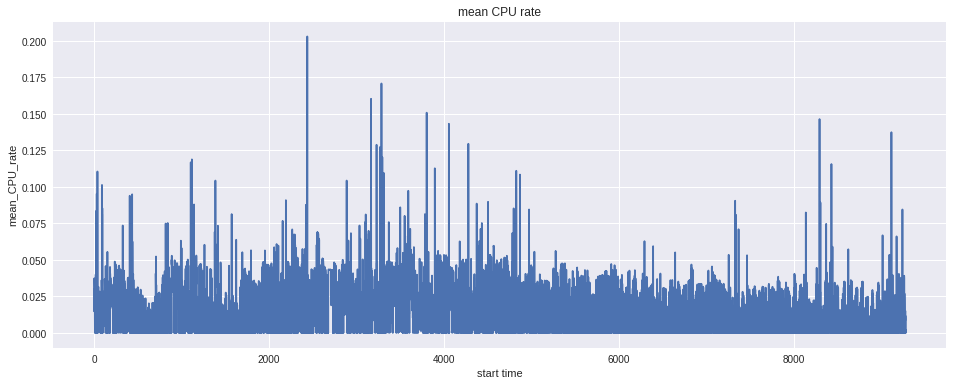

In [ ]:
plt.figure(figsize=(16,6))
plt.grid(True)
plt.xlabel('start time')
#plt.plot(cpu_df['Start time'])
plt.ylabel('mean_CPU_rate')
plt.plot(cpu_df2['Mean CPU usage rate'])
plt.title('mean CPU rate')
plt.show()

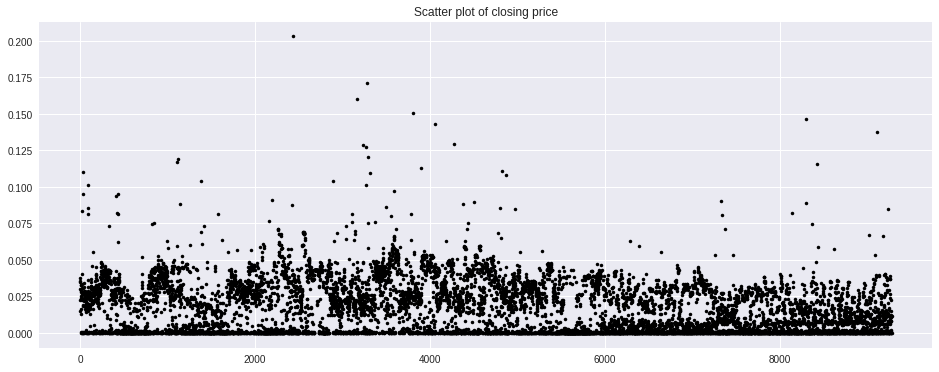

In [ ]:
plt.figure(figsize=(16,6))
df_close = cpu_df2['Mean CPU usage rate']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


#Test for Stationarity

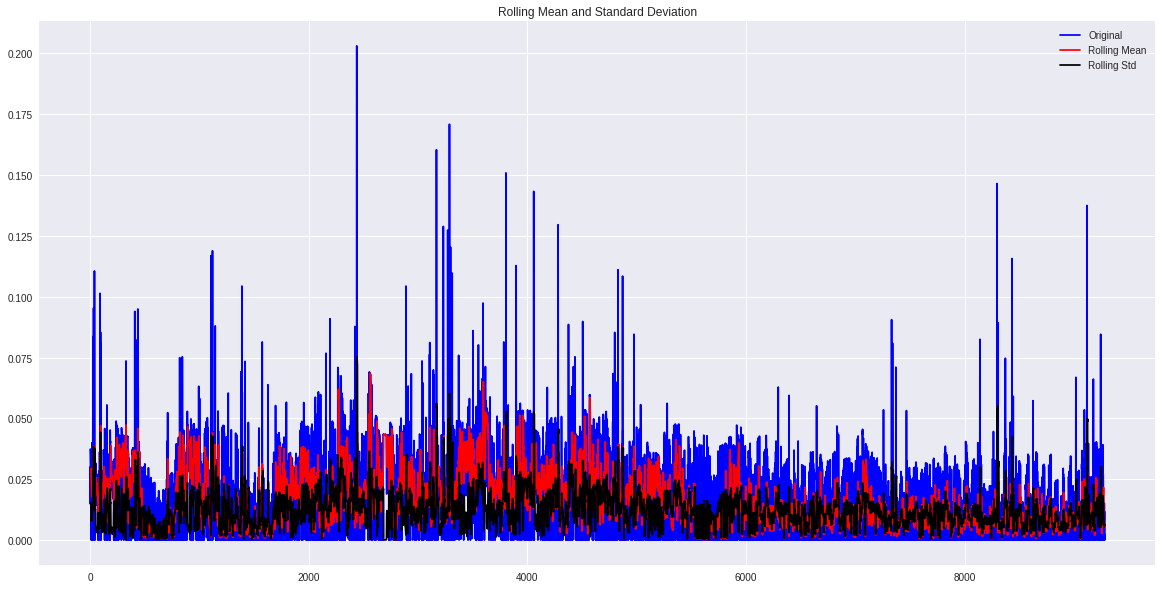

In [ ]:
#Determing rolling statistics
plt.figure(figsize=(20,10))
rolmean = df_close.rolling(window = 7).mean()
rolstd = df_close.rolling(window = 7).std()
#Plot rolling statistics:
plt.plot(df_close, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

#Augumented Dickey Fuller Test


In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataset)
print(f"ADX Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print('Critical Values:')
for key, value in result[4].items():
  print('\t{}: {}'.format(key, value))

ADX Statistic: -6.996709654644112
p-value: 7.501170495722961e-10
Critical Values:
	1%: -3.4310575301907535
	5%: -2.8618526834446465
	10%: -2.5669364363266536


#Finding p,d and q values

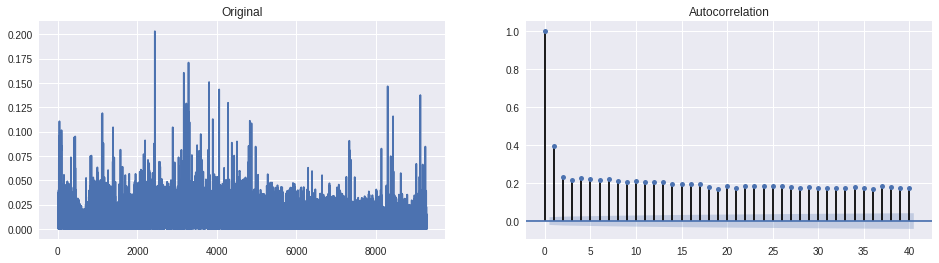

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(dataset)
ax1.set_title("Original")
plot_acf(dataset,ax = ax2);

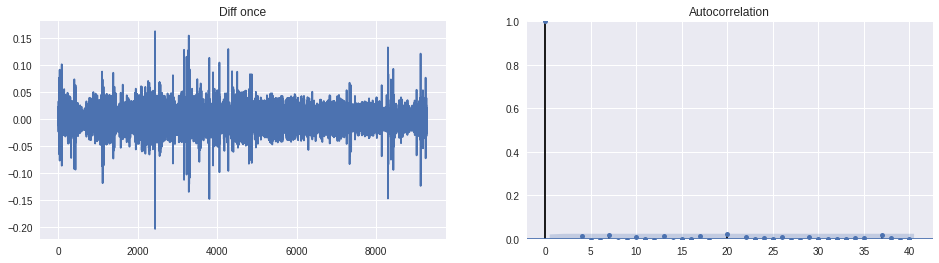

In [ ]:
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff once")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

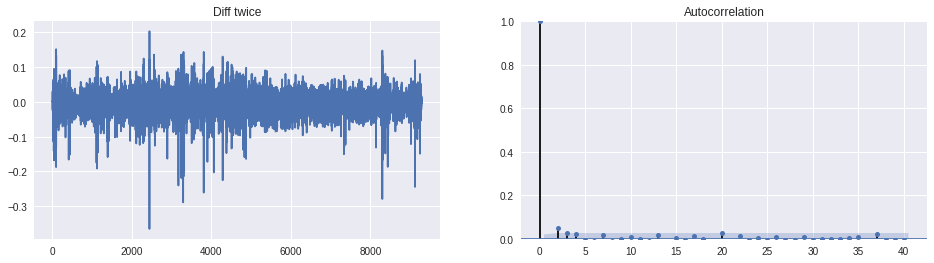

In [ ]:
diff = dataset.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff twice")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

#P-value from partial auto-correlation plot

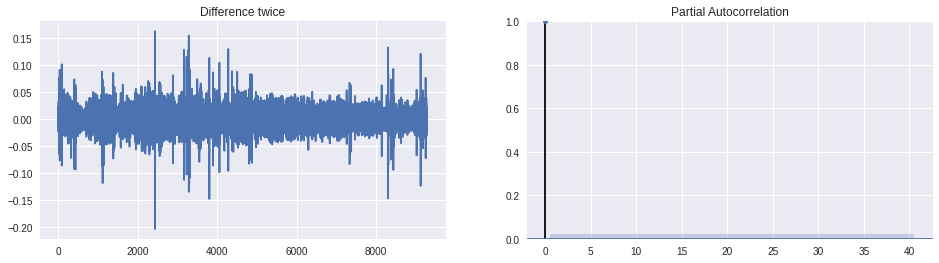

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))

ax1.plot(diff)
ax1.set_title("Difference twice")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax = ax2);

#Q-value from auto-correlation plot

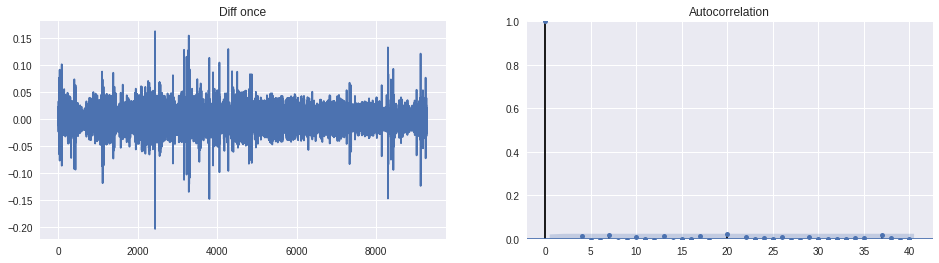

In [ ]:
diff = dataset.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
ax1.plot(diff)
ax1.set_title("Diff once")
ax2.set_ylim(0, 1)
plot_acf(diff,ax = ax2);

#Auto Arima Model

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(dataset, trace= True, suppress_warnings= True, seasonal=True,start_p=0,start_q=0, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-46614.074, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-50278.947, Time=3.65 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=-50671.695, Time=8.26 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=-50609.819, Time=6.60 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=-50711.321, Time=21.02 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=-50703.510, Time=12.79 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-47929.797, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-50739.243, Time=6.59 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=-50608.203, Time=19.74 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=-50541.211, Time=5.78 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=-50738.679, Time=37.28 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-48774.398, Time=1.47 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=-50743.438, Time=8.53 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=-50543.428, Time=6.98 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=-5

In [ ]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 9283
Model:               SARIMAX(2, 1, 1)   Log Likelihood               25376.719
Date:                Tue, 03 Aug 2021   AIC                         -50743.438
Time:                        05:01:23   BIC                         -50707.759
Sample:                             0   HQIC                        -50731.316
                               - 9283                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.268e-06   6.75e-06     -0.632      0.527   -1.75e-05    8.97e-06
ar.L1          0.2426      0.008     30.820      0.000       0.227       0.258
ar.L2         -0.0275      0.009     -3.008      0.003      -0.045      -0.010
ma.L1         -0.9637      0.003   -352.536      0.000      -0.969      -0.958
sigma2         0.0002   1.85e-06    132.452      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             25941.11
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

#ADF

In [ ]:
from statsmodels.tools.data import _is_using_pandas
from pmdarima.arima.utils import ndiffs

In [ ]:
ndiffs(dataset, test="adf")

0

#Split data to train and test

In [ ]:
n = int(len(dataset)*0.80)
train = dataset[:n]
test = dataset[n:]
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.legend()

#Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train,order = (0,0,1))
model = model.fit(disp = 0)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                              
===============================================================================
Dep. Variable:     Mean CPU usage rate   No. Observations:                 7426
Model:                      ARMA(0, 1)   Log Likelihood               19568.027
Method:                        css-mle   S.D. of innovations              0.017
Date:                 Tue, 03 Aug 2021   AIC                         -39130.054
Time:                         07:00:53   BIC                         -39109.316
Sample:                              0   HQIC                        -39122.929
                                                                               
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0181      0.000     67.169      0.000       0.018       0.019
ma.L1.Mean CPU usage rate     0.3393      0.010     34.553      0.000       0.320       0.359
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.9474           +0.0000j            2.9474            0.5000
-----------------------------------------------------------------------------
"""

<Figure size 1080x1440 with 0 Axes>

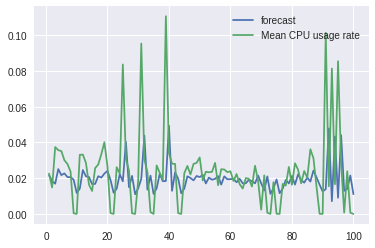

In [ ]:
fig = plt.figure(figsize=(15,20))
title = fig.suptitle("Arima Model", fontsize=22)
#plt.figure(figsize = (20,10))
model.plot_predict(start = 1, end = 100, dynamic=False)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
train_data, test_data = dataset[0:int(len(dataset)*0.8)], dataset[int(len(dataset)*0.8):]
training_data = dataset.values
test_data = dataset.values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
  model = ARIMA(history, order=(0,0,1))
  model_fit = model.fit(disp = 0)
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  true_test_value = test_data[time_point]
  history.append(true_test_value)

#Forecasting

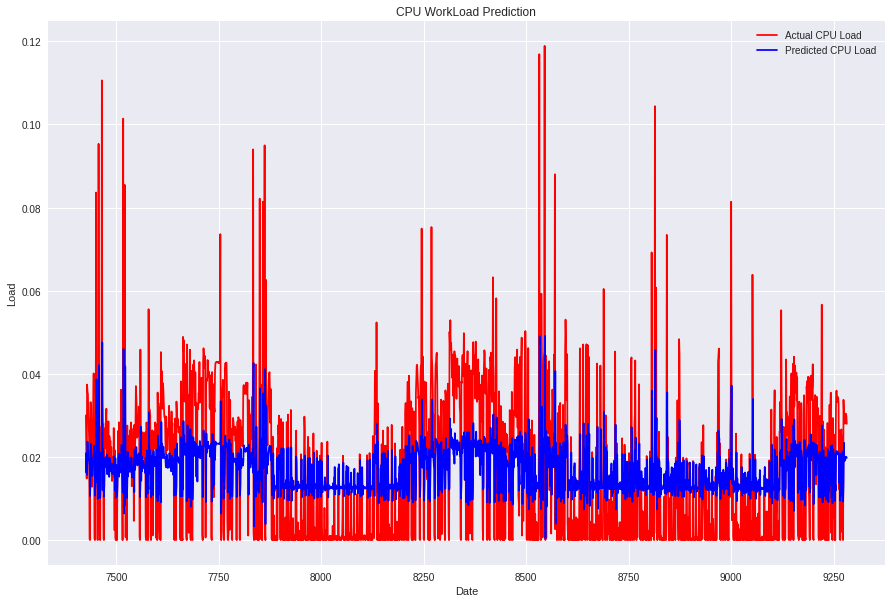

In [ ]:
fig = plt.figure(figsize=(15,10))
test_set_range = dataset[int(len(dataset)*0.8):].index
plt.plot(test_set_range, test_data[:1857], color='red', label='Actual CPU Load')
plt.plot(test_set_range, model_predictions[:1857], color='blue',label='Predicted CPU Load')

plt.title('CPU WorkLoad Prediction')
plt.xlabel('Date')
plt.ylabel('Load')
#plt.xticks(np.arange(881,1259,50), dataset.Date[881:1259:50])
plt.legend()
plt.show()

#Metrics 

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
mae = mean_absolute_error(test_data, model_predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
print('RMSE: '+str(rmse))

Testing Mean Squared Error is 0.00027885759587246083
MAE: 0.013525174005057107
RMSE: 0.01669902978835779
